### Full Example Usage Including Imports for a Scalar Function of a Scalar Variable

Here we show several examples of scalar functions of scalar variables, including an example of using our package to implement Newton's Method. 

In [1]:
#commands to change to the 
%pwd 
%cd ..
%cd AD20

/Users/jiwhanyoon/Desktop/cs207/cs207-FinalProject
/Users/jiwhanyoon/Desktop/cs207/cs207-FinalProject/AD20


In [22]:
#necessary imports
import AD20
import numpy as np
from AD20.ADnum_multivar import ADnum
from AD20 import ADmath_multivar as ADmath

x = ADnum(3, ins = 2, ind = 0) # Step 1: intialize x to a specific value
y = ADnum(4, ins = 2, ind= 1)
f = 2 * y + 2*x**2
# f = 2 * x # Step 2: write a function which we would like to take the derivative

# Steps 3 and 4: Use the class attributes to access the value and deriviative of the function at the value of the input x 

print(f.val) #should equal 81
print(f.der) #should equal 72
print(x.val) #should equal 3
print(x.der) #should equal 1
print(y.val)
print(y.der)

print(type(f.der))

26.0
[12.  2.]
3.0
[1. 0.]
4.0
[0. 1.]
<class 'numpy.ndarray'>


In [3]:
#another example with a trignometric function
x = ADnum(np.pi, der = 1) # Step 1: initialize x, this time at pi
f = ADmath.sin(x) # Step 2: create a function, using elementary functions from the ADmath module

#Steps 3 and 4: Use the class attributes to access the value and derivative
print(f.val) # should print 1.22e-16 due to floating point error in numpy implementation (should be 0)
print(f.der) # should print -1.0
print(x.val) # should print 3.14
print(x.der) # should print 1

1.2246467991473532e-16
-1.0
3.141592653589793
1.0


Suppose we wanted to easily be able to access the value and derivative of a function at many different points.  As an alternative to the method for defining `f` in the previous two examples, we could define `f` as a python function:

In [4]:
#example to easily access value and derivative at multiple points by defining f as a function
def f(x):
    return x+ADmath.exp(x)

#get the value and derivative at 0
y = ADnum(1, der = 1)
print(f(y).val, f(y).der)

#an alternate approach to get the value and derivative at 1
print(f(ADnum(1, der = 1)).val, f(ADnum(1, der = 1)).der)

3.718281828459045 3.718281828459045
3.718281828459045 3.718281828459045


In [20]:
f = ADmath.cos(4)
assert f == np.cos(4)

In [14]:
Y.val == np.sin(np.pi)

True

In [29]:
x = ADnum(3, ins = 2, ind = 0) 
y = ADnum(4, ins = 2, ind= 1)
f = 2 * y + 2*x**2
assert f.val == 2 * 4 + 2 * 3**2
assert f.der.all() == np.all(np.array([12, 2]))

Notice that in the above example, we required the natural exponential, an elementary function, to be used from the ADmath package, so that f may take as input and return an ADnum object.

## 3.5 Newton's Method for a Scalar Valued Function
One basic application of differentiation is Newton's method for finding roots of a function.  For demonstration of using our package for such an application, we will consider the function
$$f(x) = x^2 + \sin(x)$$
which we know has a root at $x=0$.  The plot below also shows that the function has an additional root near -1.

Text(0.5,1,'Plot of f(x) Showing Two Roots')

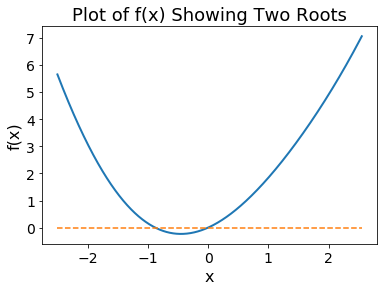

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-2.5, 2.55, 1000)
f = x**2+np.sin(x)

plt.plot(x, f, linewidth = 2)
plt.plot(x, np.zeros((1000,)), '--')
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize =14)
plt.title('Plot of f(x) Showing Two Roots', fontsize = 18)

In [30]:
#implementation of Newton's method using AD20, without hardcoding the derivative

#function that we wish to find the roots of
def f(x):
    return x**2+ADmath.sin(x)

#Newton's method
x = ADnum(1, der = 1) #set an initial guess for the root

for i in range(1000):
    dx = -f(x).val/f(x).der #get change using ADnum attributes
    if np.abs(dx) < .000001: #check if within some tolerance
        print('Root found at:' + str(x.val))
        break
    x = x+dx #update the guess


Root found at:1.2094714295298077e-11


In the above, we found the root at zero.  Using a different initialization point, we can find the other root of the function.

In [31]:
y = ADnum(-1, der = 1) #set an initial guess for the root

for i in range(1000):
    dy = -f(y).val/f(y).der #get change using ADnum attributes
    if np.abs(dy) < .000001: #check if within some tolerance
        print('Root found at:' + str(y.val))
        break
    y = y+dy #update the guess

Root found at:-0.8767262984818225
